In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt

## Load datasets and choose fields to visualize `volume` vs `price`

### Real Volume
- `volumefrom`: total volume of Bitcoin (BTC currency)
- `volumeto`: total volume of coin in EUR currency

### Price
- `close`: The price of the requested pair at the end of this period of time.

In [2]:
daily_df = pd.read_csv('raw_DAILY.csv', parse_dates=['timestr'])
hourly_df = pd.read_csv('raw_HOURLY.csv', usecols=['timestr', 'close', 'volumefrom'], parse_dates=['timestr'])

In [3]:
daily_df.head()

,timestr,time,open,close,low,high,volumefrom,volumeto
0,2022-06-09,1654732800,28178.05,28366.35,27913.93,28615.24,4745.82,1.341513e+08
1,2022-06-08,1654646400,29075.01,28178.05,27929.30,29240.20,6303.32,1.791449e+08
2,2022-06-07,1654560000,29333.24,29075.01,27384.57,29459.88,9343.23,2.636666e+08
3,2022-06-06,1654473600,27891.80,29333.24,27868.15,29656.00,6760.61,1.972956e+08
4,2022-06-05,1654387200,27867.60,27891.80,27564.67,28178.75,2298.23,6.406451e+07


In [4]:
hourly_df.head()

,timestr,close,volumefrom
0,2022-06-09 16:00:00,28366.74,84.97
1,2022-06-09 15:00:00,28426.63,280.26
2,2022-06-09 14:00:00,28266.50,427.39
3,2022-06-09 13:00:00,28208.58,600.76
4,2022-06-09 12:00:00,28036.76,808.93


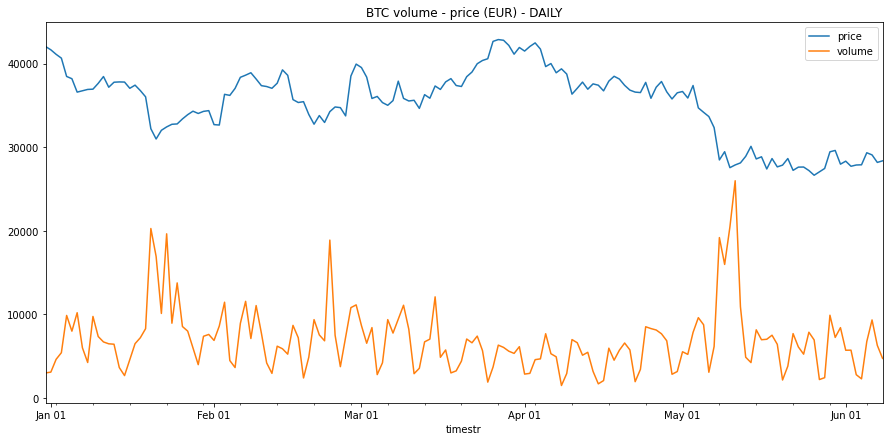

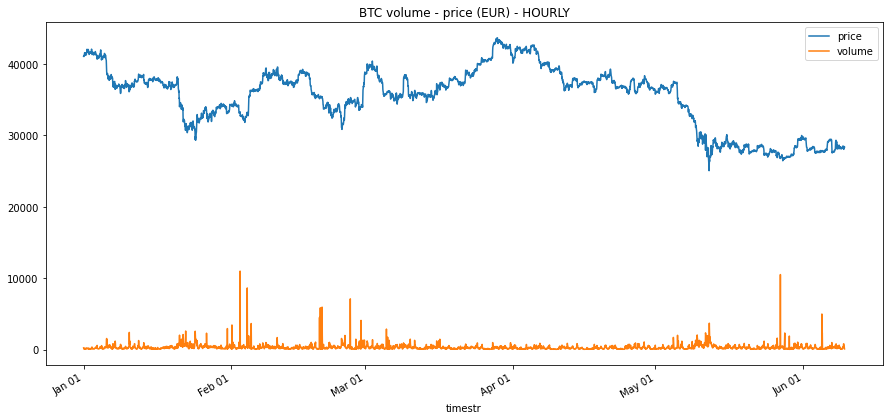

In [5]:
# plot volume vs price
import matplotlib.dates as mdates

def plot_volume_price(df, cols, legend, title):
  """
  :param df: data frame of selected dataset
  :param cols: selected fields to plot
  """
  sub_df = df[cols]
  sub_df.set_index('timestr', inplace=True)  # use `timestr` as x-axis
  fig, ax = plt.subplots(figsize=(15,7))
  sub_df.plot(ax=ax)
  ax.title.set_text(title)
  ax.legend(legend)
  ax.xaxis.set_major_locator(mdates.AutoDateLocator())
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plot_volume_price(daily_df, ['close', 'volumefrom', 'timestr'], ['price', 'volume'], 'BTC volume - price (EUR) - DAILY')
plot_volume_price(hourly_df, ['close', 'volumefrom', 'timestr'], ['price', 'volume'], 'BTC volume - price (EUR) - HOURLY')


## Investigate datasets

In [6]:
# basic stats
daily_df[['close', 'volumefrom']].describe()

,close,volumefrom
count,160.000000,160.000000
mean,35295.127312,6913.612063
std,4265.475648,3877.292734
min,26643.370000,1504.540000
25%,32743.802500,4519.217500
50%,36514.920000,6498.790000
75%,37961.057500,8180.247500
max,42864.200000,25986.570000


### show relation between price vs volume

we could not see much infos from those numbers, so let's plot the histogram to see distribution of price/volume in 6 months

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f42f1e2e290>,
      dtype=object)

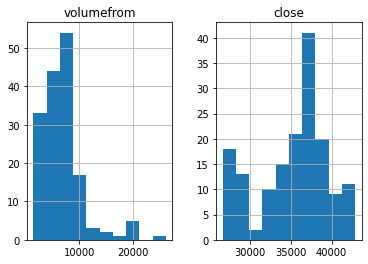

In [7]:
daily_df[['volumefrom', 'close']].hist()

The histogram of `volume` is quite interesting, most of the time, the trade is less than 10k per day. However, there are some exceptional days that it is increased significantly to 20k. Comparing with previous plots, it's clearly that on the days when Bitcoin's price is going down, the trading volume tens to increase.

In [8]:
daily_df['volumefrom'].corr(daily_df['close'])

-0.2647748652683392

although the _correlation_ is not strong, a negative number shows the trend of increasing on BTC volumne when its price decreases.

### Daily price fluctuation of Bitcoin!

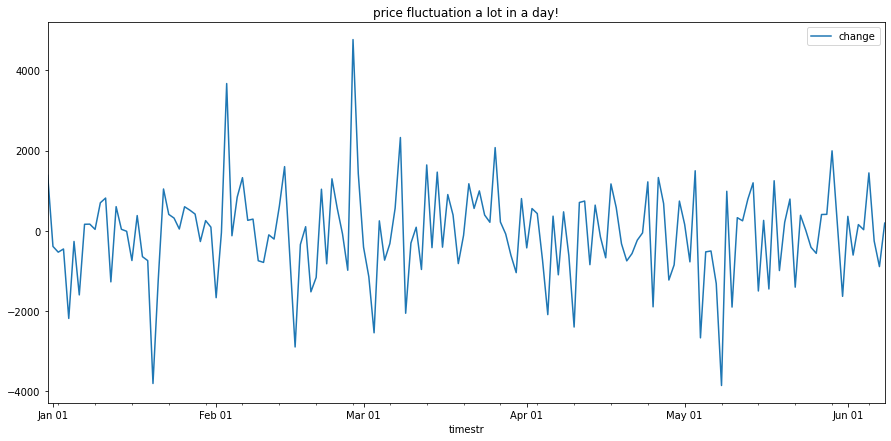

In [9]:
daily_df['change_in_day'] = (daily_df['close'] - daily_df['open'])

plot_volume_price(daily_df, ['change_in_day', 'timestr'], ['change'], 'price fluctuation a lot in a day!')

### Compare trend between months

month
2022-01    AxesSubplot(0.125,0.125;0.775x0.755)
2022-02    AxesSubplot(0.125,0.125;0.775x0.755)
2022-03    AxesSubplot(0.125,0.125;0.775x0.755)
2022-04    AxesSubplot(0.125,0.125;0.775x0.755)
2022-05    AxesSubplot(0.125,0.125;0.775x0.755)
2022-06    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: M, Name: close, dtype: object

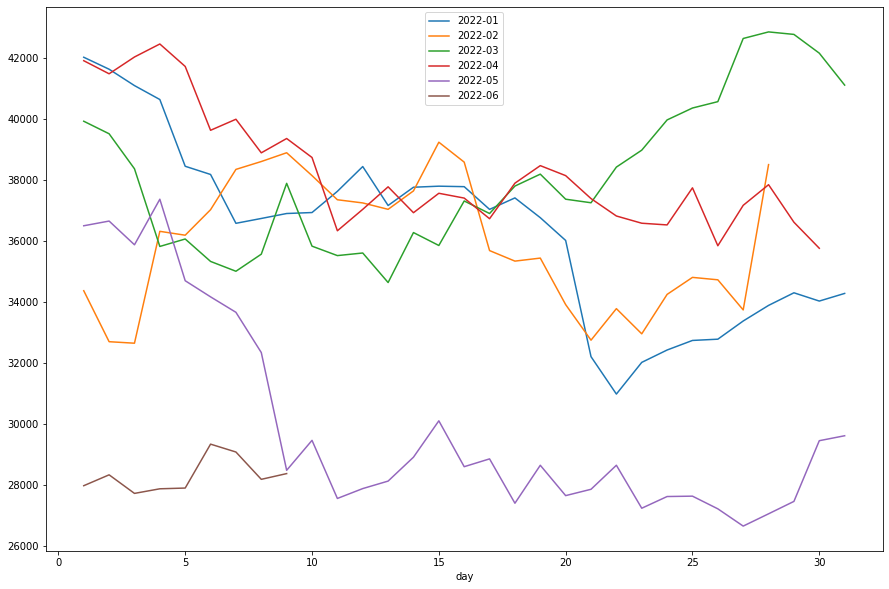

In [10]:
daily_df['month'] = daily_df['timestr'].dt.to_period('M')
daily_df['day'] = daily_df['timestr'].dt.day

daily_df.set_index('day', inplace=True)
daily_df.groupby('month')['close'].plot(legend=True, figsize=(15, 10))
# daily_df.groupby('month')['volumefrom'].plot(legend=True, figsize=(15, 10))

except May 2022 (when the overall price is low), the first 4 months seem sharing a stable price in the middle month while fluctuating a lot at the beginning/end of its month.

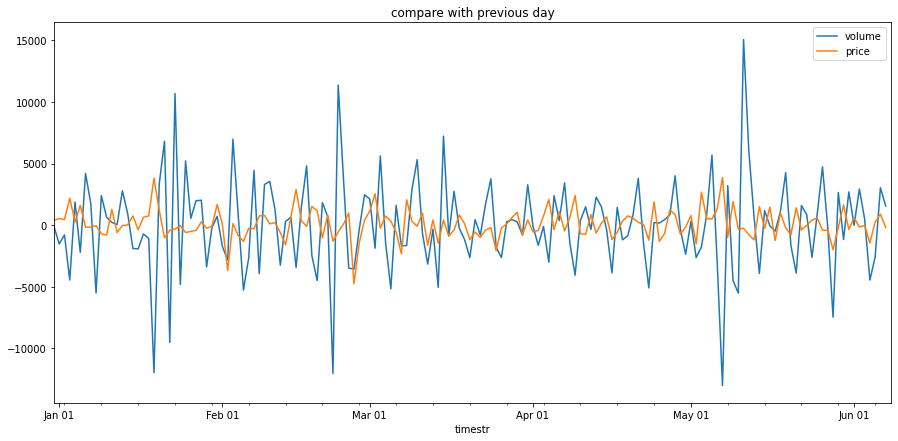

In [11]:
diff_df = pd.concat([daily_df.timestr, daily_df.volumefrom.diff(), daily_df.close.diff()], axis=1)
plot_volume_price(diff_df, diff_df.columns, ['volume', 'price'], 'compare with previous day')